<a href="https://colab.research.google.com/github/snehachavhan2004/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import gridspec

# loading the dataset

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# Null values

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


Thus there are null values in the dataset.

# Forward fill for time series data

In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-12-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# Verify the Changes

In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
df.shape

(213969, 31)

Thus there are 213969 rows and 31 columns.

# Descriptive statistics

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,213969.000000,213969.000000,213969.000000,213969.000000,213969.000000,213969.000000,213968.000000,213968.000000,213968.000000,213968.000000,...,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000
mean,74937.598400,-0.081341,-0.005532,0.246788,0.058076,-0.084204,0.039211,-0.036438,0.009684,0.005821,...,-0.010282,-0.033943,-0.012942,0.002552,0.048331,0.004040,0.000510,0.001907,90.219439,0.001860
std,37216.000232,1.913604,1.634721,1.469866,1.405334,1.364320,1.315972,1.218473,1.205105,1.129713,...,0.737983,0.700257,0.618422,0.604733,0.500736,0.487510,0.397955,0.326543,248.693776,0.043089
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,46008.000000,-0.953627,-0.590885,-0.461117,-0.810535,-0.764845,-0.720697,-0.571482,-0.188793,-0.662632,...,-0.226122,-0.534570,-0.167993,-0.345931,-0.258484,-0.331420,-0.068525,-0.045235,6.000000,0.000000
50%,70220.000000,-0.057327,0.074723,0.429846,0.058997,-0.143782,-0.227733,0.001103,0.037626,-0.070478,...,-0.038641,-0.022019,-0.025934,0.049945,0.088828,-0.061800,0.004628,0.017160,23.150000,0.000000
75%,113405.000000,1.229009,0.781213,1.184820,0.860350,0.503138,0.439689,0.519497,0.334459,0.619496,...,0.160474,0.449721,0.121188,0.424691,0.378665,0.256925,0.089067,0.078020,79.800000,0.000000
max,139471.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


# Determining number of fraud & valid cases in dataset

In [ ]:
fraud=df[df['Class']==1]
valid=df[df['Class']==0]
fraction_outliers = len(fraud)/float(len(valid))
print(fraction_outliers)
print('fraud cases {}'.format(len(df[df['Class']==1])))
print('valid cases {}'.format(len(df[df['Class']==0])))

0.0018635576157700051
fraud cases 398
valid cases 213570


# Print the amount details for Fraudulent Transaction

In [ ]:
print('Amount details of fraud detection')
fraud.Amount.describe()

Amount details of fraud detection


,Amount
count,398.000000
mean,123.841307
std,257.528158
min,0.000000
25%,1.000000
50%,13.385000
75%,105.890000
max,2125.870000


# Print the amount details for Normal Transaction

In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,213570.000000
mean,90.156783
std,248.673400
min,0.000000
25%,6.000000
50%,23.165000
75%,79.640000
max,19656.530000


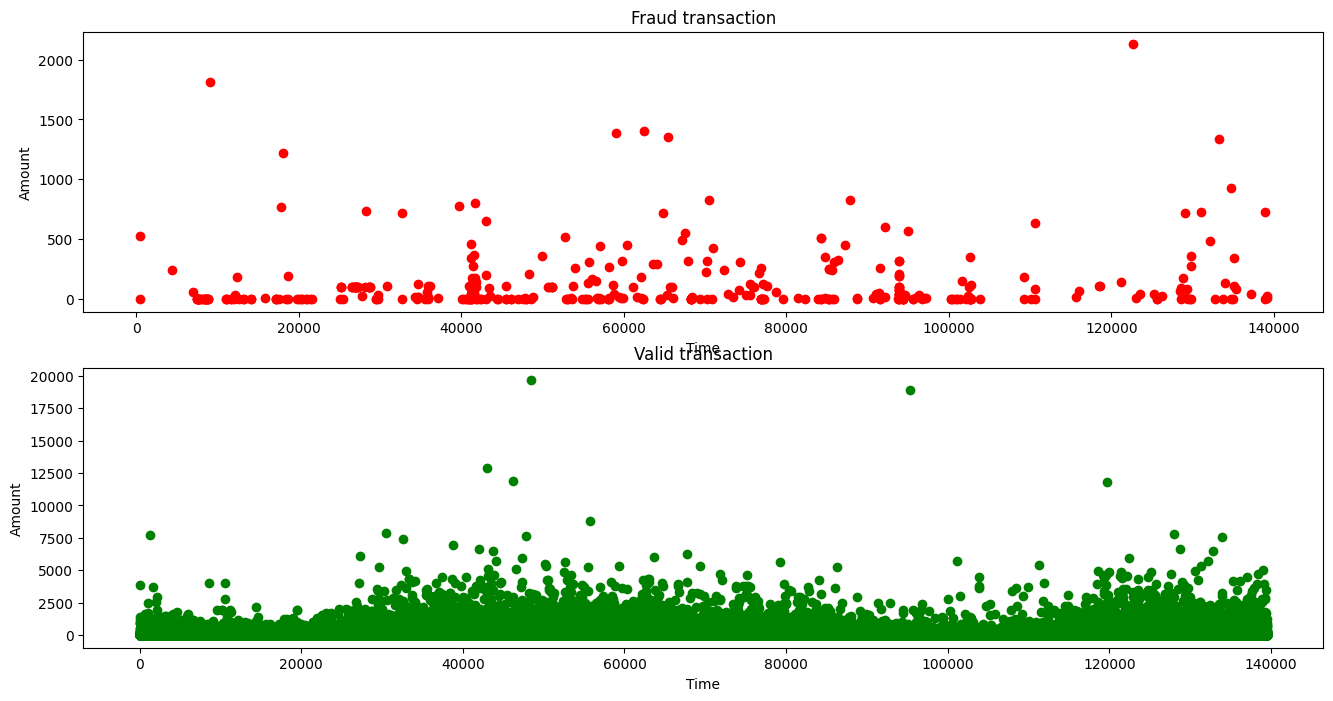

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(2,1,1)
plt.scatter(fraud['Time'],fraud['Amount'],color='red')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Fraud transaction')

plt.subplot(2,1,2)
plt.scatter(valid['Time'],valid['Amount'],color='green')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Valid transaction')
plt.show()

# Correlation

<Axes: >

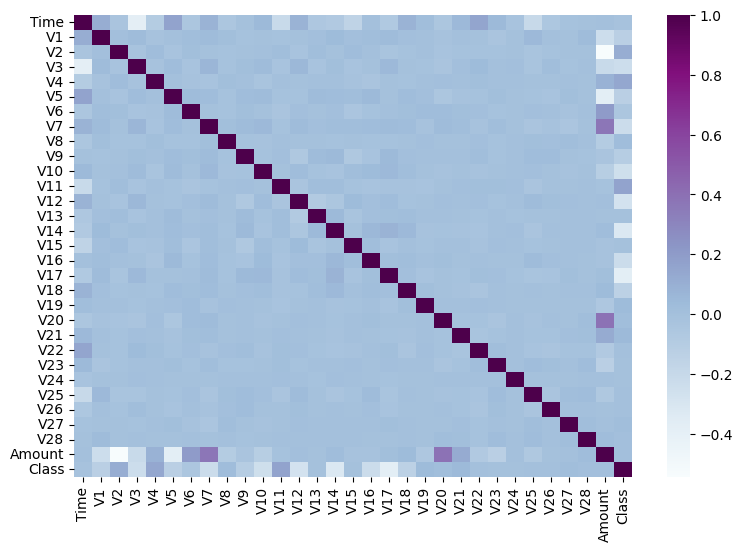

In [ ]:
plt.figure(figsize=(9,6))
corr=df.corr()
sns.heatmap(corr,cmap="BuPu")

# Let us build our models:

model 1:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
x=df.drop(['Class'],axis=1)
y=df['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
predictions=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,predictions)
print(accuracy)

0.9995014877475036


Model 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [ ]:
x=df.drop(['Class'],axis=1)
y=df['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
model2=LinearRegression()

In [ ]:
model2.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions2=model2.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9965104142325248


All of our models performed with a very high accuracy.

# Visualizing the Confusion Matrix

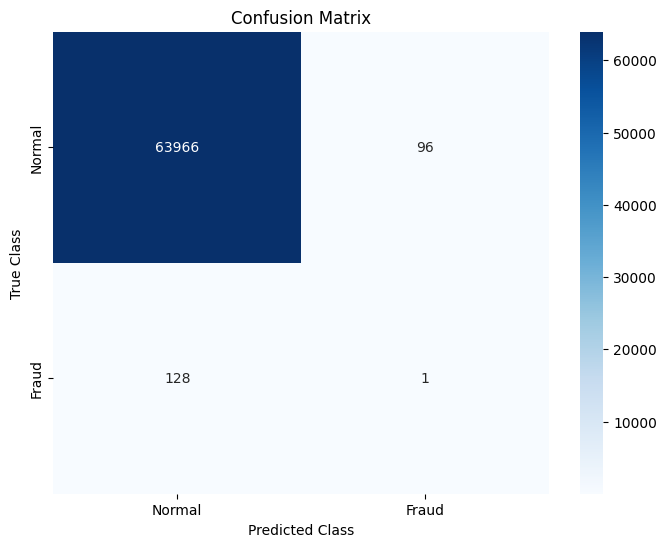

In [73]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
